$$ |\kappa_{\pm}| = |\frac{1}{2\pi} \oint ds \kappa_s(s) \sqrt{\beta_x(s)\beta_y(s)} e^{i (\phi_x\pm\phi_y-(Q_x \pm Q_y - q\pm)2\pi s/C)}|$$

where ks is the normalized gradient of the skew quadrupole (in units of m-2), $\phi_{x,y} = \frac{1}{\beta_{x,y}(s)}$ the horizontal and vertical betatron phase, C is the circumference, ßx,y are the uned beta functions

LOCO, AT version


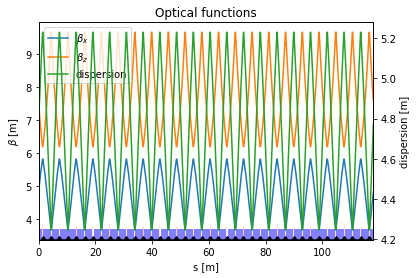

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [1]:
print(f"LOCO, AT version")

from at import *
from pylab import *
from at.load import load_mat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from random import random
from copy import copy
from copy import deepcopy
from at import elements
from at_modules_loco import *
from Lattice import *
ring=at.Lattice(ring2, energy=1)

ring.radiation_off()
ring.plot_beta()

In [2]:
t0_fullCode = time.time()

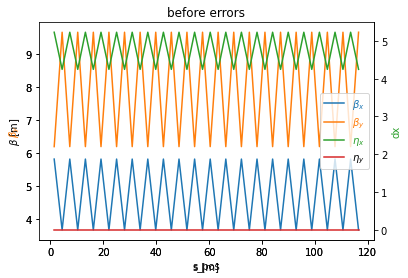

In [3]:
BPMs_random_noise = 0.0
twiss = getOptics(ring, elements.Monitor, BPMs_random_noise )
make_plot_all2(twiss, 'before errors')

In [4]:
#Turn sextuplets off
sext_indexes = get_refpts(ring,at.elements.Sextupole)
for i in sext_indexes:
    ring[i].H=ring[i].H*0
#Save quads strengths
quad_indexes = get_refpts(ring, elements.Quadrupole)
quad_strengths_before = np.array([ring[ind].K for ind in quad_indexes])
t0 = time.time()
print("Choose Used correctors")
correctors_indexes = get_refpts(ring, elements.Corrector)
print("Total number of Correctors: ", len(correctors_indexes))
correctors_names = [ring[ind].FamName for ind in correctors_indexes]
used_correctors = used_cor(1, correctors_names)
print("Number of used Correctors: ", len(used_correctors))
t1 = time.time()
print(f"Execution time choose correctors: {t1-t0} sec")

Choose Used correctors
Total number of Correctors:  40
Number of used Correctors:  40
Execution time choose correctors: 0.0011255741119384766 sec


In [5]:
eta_xx, eta_yy= eta(ring)
print(shape(eta_xx))
print(eta_yy)

(301,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
print("Choose Used Quadrpoles Families")

t0 = time.time()

steps = 1 #use all quads individually
used_qfqd_families, used_qfqd_families_ind = used_quadrpoles(ring, steps)
used_qs_families, used_qs_families_ind = used_skew(ring, steps)

used_quadrpoles_families_ind = used_qs_families_ind+used_qfqd_families_ind



t1 = time.time()
print(f"Execution time chose quadrpoles: {t1-t0} sec")

Choose Used Quadrpoles Families
# of QF: 20 # of QD: 20
used_quadrpoles_families_ind:  40
# of QS: 10
used_qs_families_ind:  10
Execution time chose quadrpoles: 0.004006385803222656 sec


In [7]:
# BPM_to_corrector_response_matrices (Model)

BPMs_random_noise = 0.0
t0 = time.time()
Cxx, Cxy= ORM_x(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy, Cyx= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
t1 = time.time()
print(f"Execution time ORMs: {t1-t0} sec")
print("orm dimensions: ", shape(Cxx))
print(norm(Cxy)) #check the coupling
print(norm(Cyx))
print(norm(Cxx))
print(norm(Cyy))

Execution time ORMs: 0.9056150913238525 sec
orm dimensions:  (40, 40)
0.0
0.0
5778.075710424884
112.00324008777744


In [8]:
dk =1.e-04

t0 = time.time()

C0x, C0y, C0xy, C0yx, dCx, dCy, dCxy,dCyx  = generatingQuadsResponse(ring, dk, Cxx, Cyy,Cxy, Cyx,BPMs_random_noise, used_quadrpoles_families_ind, used_correctors)

t1 = time.time()
print(f"Execution time: {t1-t0} sec")

generating response to family  1
Execution time: 0.8836097717285156 sec
generating response to family  2
Execution time: 0.9015979766845703 sec
generating response to family  3
Execution time: 0.8625679016113281 sec
generating response to family  4
Execution time: 0.8766515254974365 sec
generating response to family  5
Execution time: 0.8656504154205322 sec
generating response to family  6
Execution time: 0.8537533283233643 sec
generating response to family  7
Execution time: 0.8497276306152344 sec
generating response to family  8
Execution time: 0.8467023372650146 sec
generating response to family  9
Execution time: 0.8527541160583496 sec
generating response to family  10
Execution time: 0.8347735404968262 sec
generating response to family  11
Execution time: 0.8417470455169678 sec
generating response to family  12
Execution time: 0.8357658386230469 sec
generating response to family  13
Execution time: 0.846745491027832 sec
generating response to family  14
Execution time: 0.865675449

In [9]:
for i in used_qs_families_ind:
    for j in i:
        ring[j].K = 0.05

In [10]:
gradErr = 1.e-3
simulateRandomGradientErrors(ring, gradErr, used_qfqd_families_ind)
simulateAlignmentErrors(ring, 1.e-5, used_qfqd_families_ind)

In [11]:
# DRM (dispersion responce matrix)

eta_xx_err1, eta_yy_err1 = eta(ring)

print(shape(eta_yy_err1))
print(eta_yy_err1)

(301,)
[-0.09861617 -0.07712434 -0.07712434 -0.07547112 -0.07547112 -0.07423149
 -0.07481423 -0.07680412 -0.10267278 -0.12854144 -0.12854144 -0.13053134
 -0.13053134 -0.13134113 -0.13096838 -0.12612263 -0.12127688 -0.12127688
 -0.12090413 -0.12090413 -0.12119631 -0.12215395 -0.12311159 -0.13556093
 -0.14801027 -0.14801027 -0.14896791 -0.14896791 -0.14858217 -0.14685422
 -0.12439077 -0.10192733 -0.10192733 -0.10019937 -0.10019937 -0.09902001
 -0.09946871 -0.10099782 -0.12087627 -0.14075472 -0.14075472 -0.14228383
 -0.14228383 -0.14252915 -0.14148995 -0.12798031 -0.11447068 -0.11447068
 -0.11343147 -0.11343147 -0.11301547 -0.11322192 -0.11342836 -0.11611215
 -0.11879593 -0.11879593 -0.11900237 -0.11900237 -0.11813813 -0.1162058
 -0.09108542 -0.06596504 -0.06596504 -0.06403271 -0.06403271 -0.06244936
 -0.06277298 -0.06465484 -0.089119   -0.11358316 -0.11358316 -0.11546502
 -0.11546502 -0.11630211 -0.11609194 -0.11335966 -0.11062739 -0.11062739
 -0.11041721 -0.11041721 -0.11081583 -0.11182

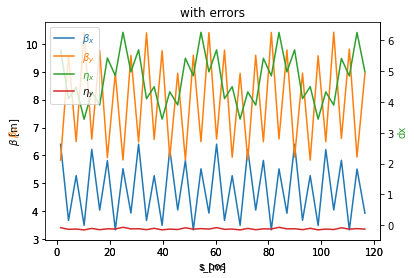

In [12]:
twiss_err = getOptics(ring, elements.Monitor, BPMs_random_noise ) #####
make_plot_all2(twiss_err, 'with errors')

Text(0, 0.5, '$\\Delta K[m^-2]$')

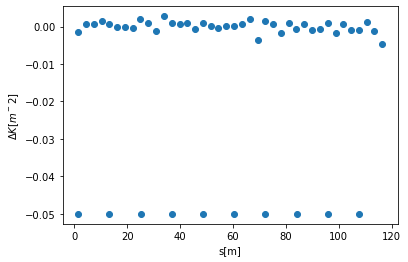

In [13]:
#quads strengths after errors
quad_indexes = get_refpts(ring, elements.Quadrupole)
twissq = getOptics(ring, elements.Quadrupole, BPMs_random_noise )
quad_strengths_after = np.array([ring[ind].K for ind in quad_indexes])
plt.scatter(twissq.s_pos, np.array(quad_strengths_before)- np.array(quad_strengths_after))
plt.xlabel("s[m]")
plt.ylabel("$\Delta K[m^-2]$")

In [14]:
bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_err)

RMS beta beat, x:7.219433821729257%   y: 5.384927072766739%
STD beta beat, x:7.202843811186646%   y: 5.377794214555074%


In [15]:
Cxx11, Cxy11= ORM_x(1.e-4, ring, BPMs_random_noise,used_correctors)
Cyy11, Cyx11= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)

In [16]:
numberOfIteration = 5
for x in range(numberOfIteration):
    print('iteration'+str(x) +':')
    twiss_error0 = getOptics(ring, elements.Monitor, BPMs_random_noise)
    Cxx1, Cxy1= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy1, Cyx1= ORM_y(1.e-4, ring, BPMs_random_noise, used_correctors)
    eta_xx_err, eta_yy_err= eta(ring)
    k1_err, k2_err = coupling_parameters(ring, '*')
    A, B = defineMatrices(C0x, C0y, C0xy, C0yx, Cxx1, Cyy1, Cxy1, Cyx1, dCx, dCy, dCxy,dCyx)
    dk = len(dCx)
    cut = 50
    r= getInverse(A, B,dk, cut)
    #print("r................", r)
    setCorrection(ring, r , used_quadrpoles_families_ind)
    twiss_corrected = getOptics(ring, elements.Monitor, BPMs_random_noise)
    eta_xx_corr, eta_yy_corr= eta( ring)
    print('beta beating with errors')
    bx_rms1, by_rms1 = getBetaBeat(twiss, twiss_error0)
    print('beta beating after corrections')
    bx_rms2, by_rms2= getBetaBeat(twiss, twiss_corrected)
    print('betax_correction reduction', (1-bx_rms2/bx_rms1)*100)
    print('betax_correction reduction', (1-by_rms2/by_rms1)*100)
    print('_________________________________')
    print('dispersion with errors')
    etax_err, etay_err = getEta(eta_xx, eta_yy, eta_xx_err, eta_yy_err, ring)
    print('dispersion after correction')
    etax_cor, etay_cor = getEta(eta_xx, eta_yy, eta_xx_corr, eta_yy_corr, ring)
    print('x_dispersion_correction reduction', (1-etax_cor/etax_err)*100)
    print('y_dispersion_correction reduction', (1-etay_cor/etay_err)*100)
    print('_________________________________')
    k1_cor, k2_cor  = coupling_parameters(ring, '*')
    Cxx2, Cxy2= ORM_x(1.e-4, ring, BPMs_random_noise, used_correctors)
    Cyy2, Cyx2= ORM_y(1.e-4, ring, BPMs_random_noise,  used_correctors)


    print('Coupling_parameters before correction:')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_err )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_err )
    print('Coupling_parameters after correction')
    print('Coupling Coefficients (driving term for sum_resonances)  k : ',k1_cor )
    print('Coupling Coefficients (driving term for diff_resonances)  k : ',k2_cor )


iteration0:
beta beating with errors
RMS beta beat, x:7.219433821729257%   y: 5.384927072766739%
STD beta beat, x:7.202843811186646%   y: 5.377794214555074%
beta beating after corrections
RMS beta beat, x:0.1493419177627135%   y: 0.022012847566958666%
STD beta beat, x:0.14920075223765625%   y: 0.020603583372077426%
betax_correction reduction 97.93139016922325
betax_correction reduction 99.5912136363316
_________________________________
dispersion with errors
get Eeta dx and dy: 
RMS Dispersion, x:13.792595719781332%   y: 11.660658750686775%
STD Dispersion, x:13.792461713984485%   y: 2.1629169205916843%
dispersion after correction
get Eeta dx and dy: 
RMS Dispersion, x:1.6383526103181019%   y: 0.021915145604590652%
STD Dispersion, x:1.638206975297992%   y: 0.021883686271320996%
x_dispersion_correction reduction 88.12150632408968
y_dispersion_correction reduction 99.81205911198371
_________________________________
Coupling_parameters before correction:
Coupling Coefficients (driving term

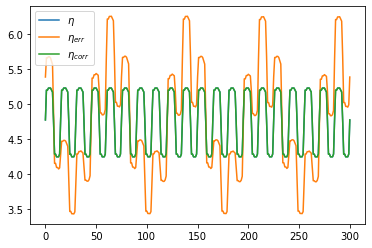

In [17]:
compare_drm(eta_xx, eta_xx_err1, eta_xx_corr)

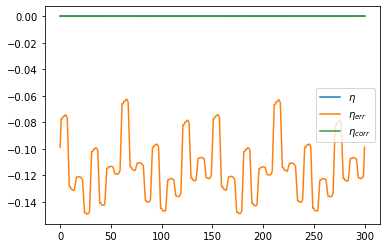

In [18]:
compare_drm(eta_yy, eta_yy_err1, eta_yy_corr)

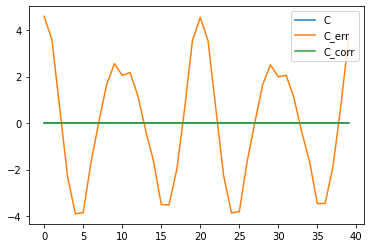

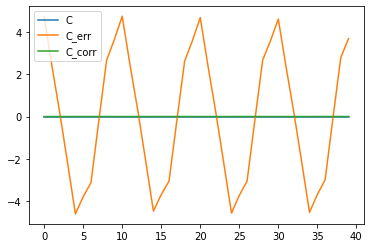

In [19]:
compare_orm(C0xy, Cxy11, Cxy2,25)
compare_orm(C0yx, Cyx11, Cyx2,25)

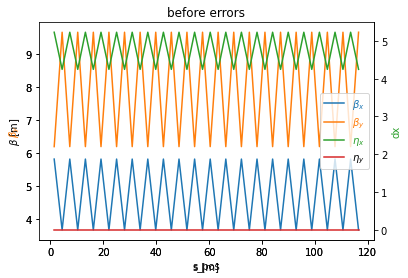

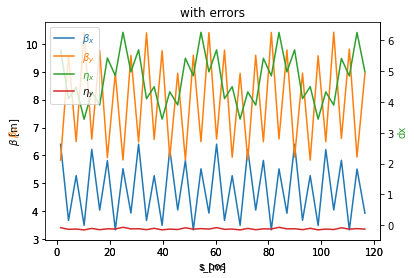

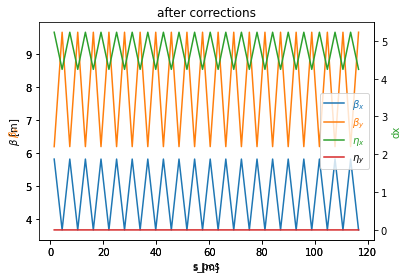

In [20]:
make_plot_all2(twiss, 'before errors')
make_plot_all2(twiss_err, 'with errors')
make_plot_all2(twiss_corrected, 'after corrections')

In [21]:
t1_fullCode = time.time()
print(f"Execution time: {t1_fullCode-t0_fullCode} sec")

Execution time: 58.99197864532471 sec
